In [16]:
import torch
import json
from torchvision import transforms
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
location = "./data/lookbook/data/PID000000_CLEAN0_IID000002.jpg"
person_image = Image.open(location)

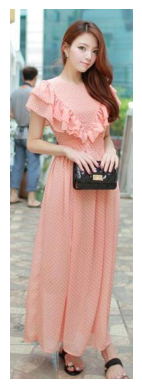

In [3]:
import matplotlib.pyplot as plt

plt.imshow(person_image)
plt.axis('off')
plt.show()

In [14]:
# LOCATIONS

PERSON_IMAGE_LOCATION = "./data/lookbook/data/PID000000_CLEAN0_IID000002.jpg"
RESIZED_PERSON_IMAGE_LOCATION = "./temp/resized_person.jpg"
CLOTH_IMAGE_LOCATION = "./data/lookbook/data/PID000006_CLEAN1_IID000120.jpg"
RESIZED_CLOTH_IMAGE_LOCATION = "./temp/resized_cloth.jpg"
RESIZED_CLOTH_MASK_LOCATION = "./temp/resized_cloth_mask.jpg"

In [ ]:
person_image = Image.open(PERSON_IMAGE_LOCATION)
person_image.resize((192, 256))
person_image.save(RESIZED_PERSON_IMAGE_LOCATION)
input_tensor = transform(person_image).unsqueeze(0)

In [15]:
cloth_image = cv2.imread(CLOTH_IMAGE_LOCATION, cv2.IMREAD_GRAYSCALE)
_, cloth_mask = cv2.threshold(cloth_image, 1, 255, cv2.THRESH_BINARY)

# Convert the NumPy array to a PIL Image
cloth_image_pil = Image.fromarray(cloth_image)
cloth_mask_pil = Image.fromarray(cloth_mask)

# Save the images using PIL
cloth_image_pil.save(RESIZED_CLOTH_IMAGE_LOCATION)
cloth_mask_pil.save(RESIZED_CLOTH_MASK_LOCATION)

In [12]:

with open('path/to/output_keypoints.json') as f:
    keypoints = json.load(f)
pose_keypoints = np.array(keypoints['people'][0]['pose_keypoints_2d']).reshape(-1, 3)

np.save('path/to/pose_keypoints.npy', pose_keypoints)

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [ ]:

# Load pre-trained CP-VTON model
model = torch.load('path/to/cp-vton.pth')
model.eval()

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.ToTensor()
])

# Load and preprocess images
person_image = Image.open(RESIZED_PERSON_IMAGE_LOCATION)
cloth_image = Image.open(RESIZED_CLOTH_IMAGE_LOCATION)

person_tensor = transform(person_image).unsqueeze(0)
cloth_tensor = transform(cloth_image).unsqueeze(0)

# Load and preprocess segmentation map and cloth mask
segmentation_map = Image.open(IMAGE_PARSE_LOCATION)
cloth_mask = Image.open('path/to/cloth_mask.png')

segmentation_tensor = transform(segmentation_map).unsqueeze(0)
cloth_mask_tensor = transform(cloth_mask).unsqueeze(0)

# Load pose keypoints
pose_keypoints = np.load('path/to/pose_keypoints.npy')

# Convert pose keypoints to tensor
pose_tensor = torch.tensor(pose_keypoints).unsqueeze(0).float()

# Run inference
with torch.no_grad():
    output = model(person_tensor, cloth_tensor, segmentation_tensor, cloth_mask_tensor, pose_tensor)

# Post-process and display the output
output_image = transforms.ToPILImage()(output.squeeze(0))
output_image.show()

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(output_image)
plt.axis('off')
plt.show()